In [15]:
import numpy as np
import pandas as pd
import matplotlib as plt
dataset=pd.read_csv('src/neural_network/dengue_features_train.csv')
datas=pd.read_csv('src/neural_network/dengue_labels_train.csv')

del dataset['week_start_date']

In [16]:
df_sj = dataset[dataset['city'] == 'sj']
df_iq = dataset[dataset['city'] == 'iq']

df_sjlb=datas[datas['city'] == 'sj']
df_iqlb=datas[datas['city'] == 'iq']

In [17]:
#for spiliting the data in dependent and independent form
X1=df_sj.iloc[:,0:24].values
X2=df_iq.iloc[:,0:24].values

Y1=df_sjlb.iloc[:,0:4].values
Y2=df_iqlb.iloc[:,0:4].values

y1=Y1[:,3:4]
y2=Y2[:,3:4]

In [18]:
#labelencodig to the training dataset
from sklearn.preprocessing import LabelEncoder
lb_X1=LabelEncoder()
X1[:,0]=lb_X1.fit_transform(X1[:,0])

In [19]:
#for removing the null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X1[:, 3:24] = imputer.fit_transform(X1[:, 3:24])

In [20]:
#normalise data
from sklearn.preprocessing import StandardScaler
sc_X1=StandardScaler()
X1=sc_X1.fit_transform(X1)

In [21]:
#onehotencode training dataset
from sklearn.preprocessing import LabelEncoder
lb_X2=LabelEncoder()
X2[:,0]=lb_X2.fit_transform(X2[:,0])

In [22]:
#impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X2[:, 3:24] = imputer.fit_transform(X2[:, 3:24])

In [23]:
#normalise data
from sklearn.preprocessing import StandardScaler
sc_X2=StandardScaler()
X2=sc_X2.fit_transform(X2)

In [24]:
#loading the testing dataset
test=pd.read_csv("data/dengue_features_test.csv")

del test['week_start_date']
df_testsj = test[test['city'] == 'sj']
df_testiq = test[test['city'] == 'iq']


x_test1=df_testsj.iloc[:,0:24].values
x_test2=df_testiq.iloc[:,0:24].values


In [25]:
#labelencodig to the training dataset
from sklearn.preprocessing import LabelEncoder
lb_test1=LabelEncoder()
x_test1[:,0]=lb_test1.fit_transform(x_test1[:,0])


#for removing the null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_test1[:, 3:24] = imputer.fit_transform(x_test1[:, 3:24])


#noamlise test data
from sklearn.preprocessing import StandardScaler
sc_X11=StandardScaler()
x_test1=sc_X11.fit_transform(x_test1)


#onehotencode to the training dataset
from sklearn.preprocessing import LabelEncoder
lb_test2=LabelEncoder()
x_test2[:,0]=lb_test2.fit_transform(x_test2[:,0])


#for removing the null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_test2[:, 3:24] = imputer.fit_transform(x_test2[:, 3:24])

#normalise
from sklearn.preprocessing import StandardScaler
sc_X22=StandardScaler()
x_test2=sc_X22.fit_transform(x_test2)

In [26]:
from sklearn.model_selection import train_test_split

# Assuming X and y contain your feature and target data, respectively

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [28]:
#creating the ann model
import keras
from keras import Sequential
from keras.layers import Dense
def build_regressor1():
    regressor1 = Sequential()
    regressor1.add(Dense(units=64, input_dim=23, activation="relu"))
    regressor1.add(Dense(units=64, activation="relu"))
    regressor1.add(Dense(units=1))
    regressor1.compile(optimizer='Adam', loss='mean_absolute_error',  metrics=['mae'])
    return regressor1

from keras.wrappers.scikit_learn import KerasRegressor
regressor1 = KerasRegressor(build_fn=build_regressor1, batch_size=32,epochs=2500)

result1=regressor1.fit(X1_train.astype(float),y1_train.astype(float))

def build_regressor2():
    regressor2 = Sequential()
    regressor2.add(Dense(units=64, input_dim=23, activation="relu"))
    regressor2.add(Dense(units=64, activation="relu"))
    regressor2.add(Dense(units=1))
    regressor2.compile(optimizer='Adam', loss='mean_absolute_error',  metrics=['mae'])
    return regressor2

from keras.wrappers.scikit_learn import KerasRegressor
regressor2 = KerasRegressor(build_fn=build_regressor2, batch_size=32,epochs=2500)

result2=regressor2.fit(X2_train.astype(float),y2_train.astype(float))



Epoch 1/2500


/var/folders/_6/qfy7c9f97wn3g4k1v_b4dvmh0000gn/T/ipykernel_16152/3750301744.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor1 = KerasRegressor(build_fn=build_regressor1, batch_size=32,epochs=2500)


24/24 [==============================] - 1s 21ms/step - loss: 33.0146 - mae: 33.0146
Epoch 2/2500
24/24 [==============================] - 0s 11ms/step - loss: 29.7860 - mae: 29.7860
Epoch 3/2500
24/24 [==============================] - 0s 10ms/step - loss: 26.1578 - mae: 26.1578
Epoch 4/2500
24/24 [==============================] - 0s 13ms/step - loss: 24.0306 - mae: 24.0306
Epoch 5/2500
24/24 [==============================] - 0s 6ms/step - loss: 23.3799 - mae: 23.3799
Epoch 6/2500
24/24 [==============================] - 0s 5ms/step - loss: 22.9823 - mae: 22.9823
Epoch 7/2500
24/24 [==============================] - 0s 3ms/step - loss: 22.6783 - mae: 22.6783
Epoch 8/2500
24/24 [==============================] - 0s 2ms/step - loss: 22.4042 - mae: 22.4042
Epoch 9/2500
24/24 [==============================] - 0s 3ms/step - loss: 22.1340 - mae: 22.1340
Epoch 10/2500
24/24 [==============================] - 0s 4ms/step - loss: 21.9132 - mae: 21.9132
Epoch 11/2500
24/24 [=================

/var/folders/_6/qfy7c9f97wn3g4k1v_b4dvmh0000gn/T/ipykernel_16152/3750301744.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor2 = KerasRegressor(build_fn=build_regressor2, batch_size=32,epochs=2500)


13/13 [==============================] - 0s 1ms/step - loss: 7.4482 - mae: 7.4482
Epoch 2/2500
13/13 [==============================] - 0s 2ms/step - loss: 6.7960 - mae: 6.7960
Epoch 3/2500
13/13 [==============================] - 0s 823us/step - loss: 6.3435 - mae: 6.3435
Epoch 4/2500
13/13 [==============================] - 0s 995us/step - loss: 6.0350 - mae: 6.0350
Epoch 5/2500
13/13 [==============================] - 0s 1ms/step - loss: 5.8527 - mae: 5.8527
Epoch 6/2500
13/13 [==============================] - 0s 1ms/step - loss: 5.7614 - mae: 5.7614
Epoch 7/2500
13/13 [==============================] - 0s 2ms/step - loss: 5.6936 - mae: 5.6936
Epoch 8/2500
13/13 [==============================] - 0s 1ms/step - loss: 5.6310 - mae: 5.6310
Epoch 9/2500
13/13 [==============================] - 0s 1ms/step - loss: 5.5761 - mae: 5.5761
Epoch 10/2500
13/13 [==============================] - 0s 1ms/step - loss: 5.5433 - mae: 5.5433
Epoch 11/2500
13/13 [==============================] - 0s 

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

test_pred1=regressor1.predict(X1_test)
r2 = r2_score(test_pred1, y1_test)
mae1 = mean_absolute_error(test_pred1, y1_test)

test_pred2 = regressor2.predict(X2_test)
r3 = r2_score(test_pred2, y2_test)
mae2 = mean_absolute_error(test_pred2, y2_test)


print("R2 Score:", r2, r3)
print("MAE Score:", mae1, mae2)

4/4 [==============================] - 0s 12ms/step
R2 Score: -0.15349041441332623 -0.3546564091603224
MAE Score: 32.585069219482705 9.912369278761057


(13.957881, array([64], dtype=object))

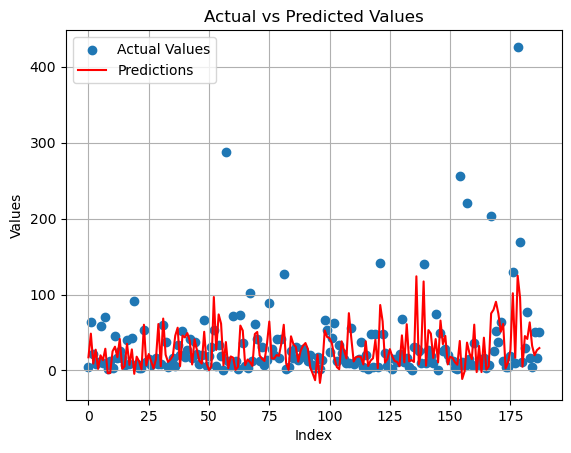

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual values and predictions contains predicted values

# Scatter plot of actual values
plt.scatter(range(len(y1_test)), y1_test, label='Actual Values')

# Line plot of predicted values
plt.plot(range(len(test_pred1)), test_pred1, color='red', label='Predictions')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


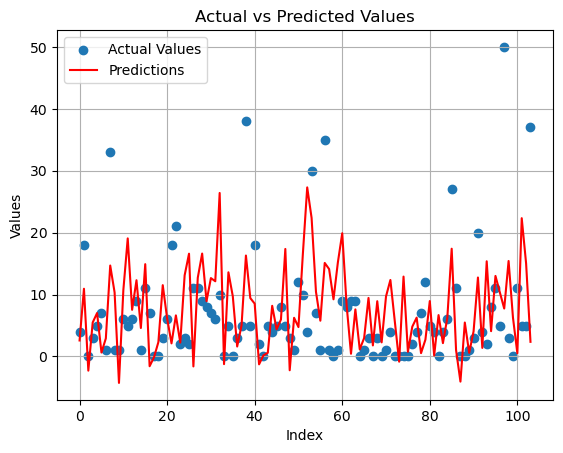

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual values and predictions contains predicted values

# Scatter plot of actual values
plt.scatter(range(len(y2_test)), y2_test, label='Actual Values')

# Line plot of predicted values
plt.plot(range(len(test_pred2)), test_pred2, color='red', label='Predictions')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
